In [14]:
%matplotlib inline
import xarray as xr
from config_calc import *

ds = xr.open_dataset('/glade/scratch/mclong/calcs/iucn-ch/work/tr85.001.ann_dft.O2.1920-2100.nc',decode_times=False)
ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 181, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                   (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 ...
    TLAT                  (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 ...
    TLONG                 (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 ...
    ULAT                  (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 ...
    ULONG                 (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.4882 -78.9529 -78.4187 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 300

In [12]:
dso = ds.copy().drop([k for k in ds
                      if 'time' in ds[k].dims])

dso['VOL'] = ds.dz * ds.TAREA
for j in range(len(ds.nlat)):
    for i in range(len(ds.nlon)):
        k = ds.KMT.values[j,i].astype(int)
        dso.VOL.values[k:,j,i] = 0.

dso['VOL_klevel_wgt'] = dso.VOL.copy()
for k in range(len(ds.z_t)):
    dso.VOL_klevel_wgt[k,:,:] = dso.VOL[k,:,:] / dso.VOL[k,:,:].sum(dim=('nlat','nlon'))
dso    

<xarray.Dataset>
Dimensions:               (lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                   (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 ...
    TLAT                  (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 ...
    TLONG                 (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 ...
    ULAT                  (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 ...
    ULONG                 (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.4882 -78.9529 -78.4187 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 3000.0 4000.0 ...
  *

In [15]:
dsv = dso
vol_wgt = dsv.VOL / dsv.VOL.sum(dim=('nlat','nlon'))
for variable in ds:
    if not all([d in ds[variable].dims for d in ['time','nlat','nlon']]):
        continue

    if ds[variable].dims == ('time','z_t','nlat','nlon'):
        
         ds[variable] = (ds[variable] * vol_wgt).sum(dim=['nlat','nlon'])

    elif ds[variable].dims == ('time','nlat','nlon'):
        ds[variable] = (ds[variable] * ds.TAREA).sum(dim=['nlat','nlon'])


ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 181, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                   (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 ...
    TLAT                  (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 ...
    TLONG                 (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 ...
    ULAT                  (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 ...
    ULONG                 (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.4882 -78.9529 -78.4187 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 300

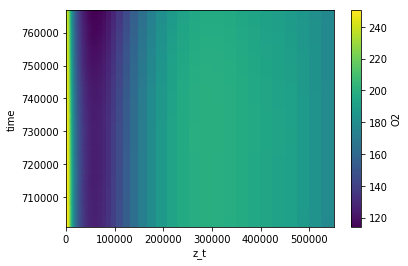

In [4]:
ds.O2.plot()

In [10]:
vol_wgt = dsv.VOL / dsv.VOL.sum(dim=('nlat','nlon'))
vol_wgt

<xarray.DataArray 'VOL' (z_t: 60, nlat: 384, nlon: 320)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       ..., 
       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ..., 
        [ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.]]])
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 4.5e+03 5.5e+03 ...
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 -

In [16]:
ds.O2.attrs

OrderedDict()

In [22]:
avg_over_dims = ['nlat','nlon']
ds['area_sum'] = ds.TAREA.where(ds.KMT > 0).sum(avg_over_dims)
ds
x = 22.

In [23]:
if not x: 
    print 'as'

In [24]:
x = 0
if not x:
    print 'asd'

asd
